In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datos = pd.read_excel('/content/drive/MyDrive/rend_2016a2022_modificadoxls.xlsx',sheet_name="REND",skiprows=0)

# Extraccion de datos
Separo los datos de las materias que me interesan. La materia 'principal' es calculo 2, de esta voy a sacar los alumnos

In [7]:
c2 = datos[datos['Asignatura'] == 'CALCULO 2']
c2 = c2[c2.Anho!=2020]
c2 = c2[c2.Anho!=2016]
c2.columns

Index(['Idalumno', 'Cod.Asign', 'Asignatura', 'Cod.Car.Sec', 'Semestre',
       'Convocatoria', 'Anho', 'Ciclo', 'Aprobado', 'Firma.Anho', '1P', '2P',
       '3P', '4P', '4P_60', 'T', 'Asistencia', 'Requisito', '1R', '2R',
       'Nota.Final', 'periodo1', 'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F'],
      dtype='object')

# Visualizar los datos
primero vemos los alumnos por carrera por año.

(tener en cuenta que por como funciona hist los graficos no estan centrados con la etiqueta, por lo que cada barra representa la etiqueta que tiene al comienzo de la misma)

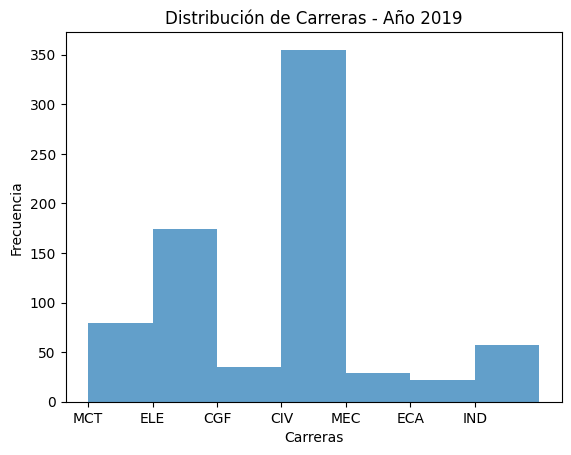

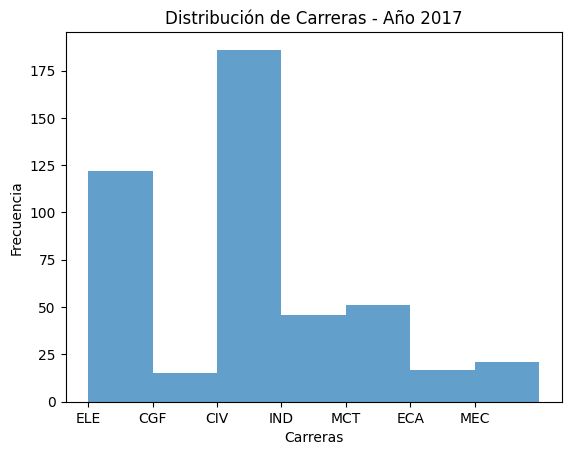

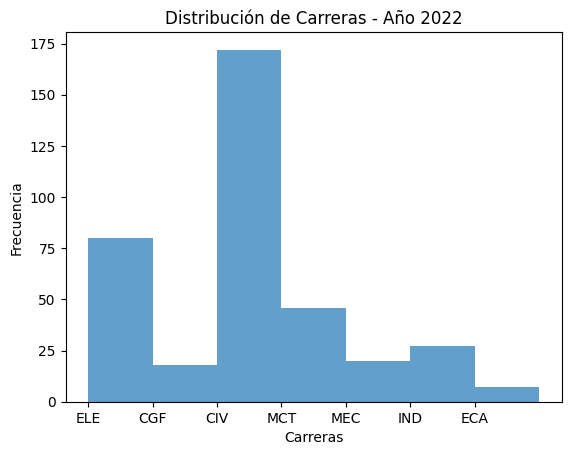

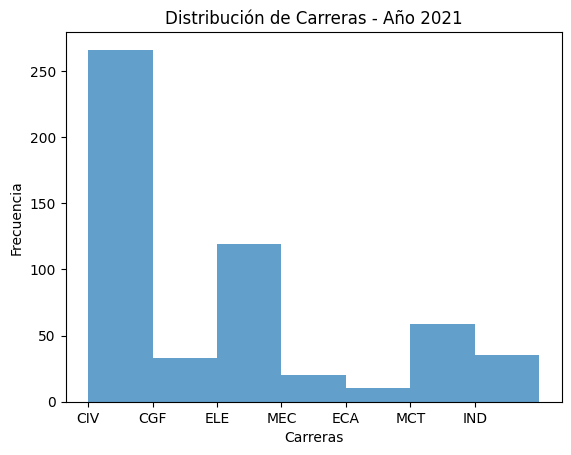

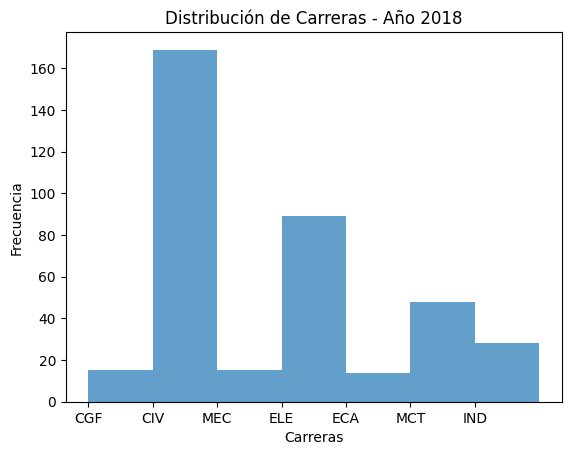

In [9]:
for i in c2.index:

  if ('CIV' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='CIV'
  elif ('IND' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='IND'
  elif ('MEC' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='MEC'
  elif ('ELE' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='ELE'
  elif ('MCT' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='MCT'
  elif ('CGF' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='CGF'
  elif ('ECA' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'Cod.Car.Sec']='ECA'

años = c2['Anho'].unique()
for i in años:
  datos_año = c2[c2['Anho']==i]['Cod.Car.Sec']
  plt.figure()
  plt.hist(datos_año, bins=range(len(datos_año.unique()) + 1), alpha=0.7)
  plt.xlabel('Carreras')
  plt.ylabel('Frecuencia')
  plt.title(f'Distribución de Carreras - Año {i}')
  plt.show()


Ver los aprobados por año

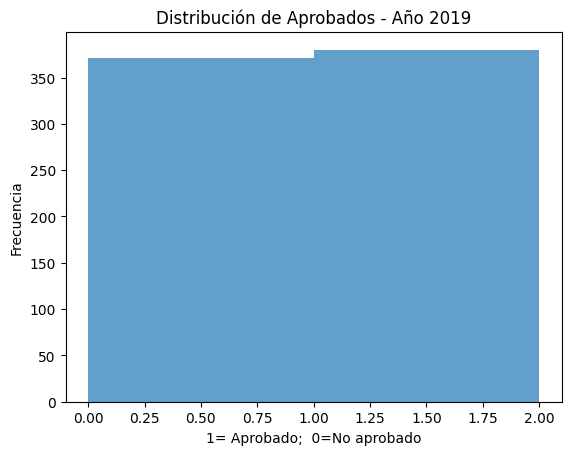

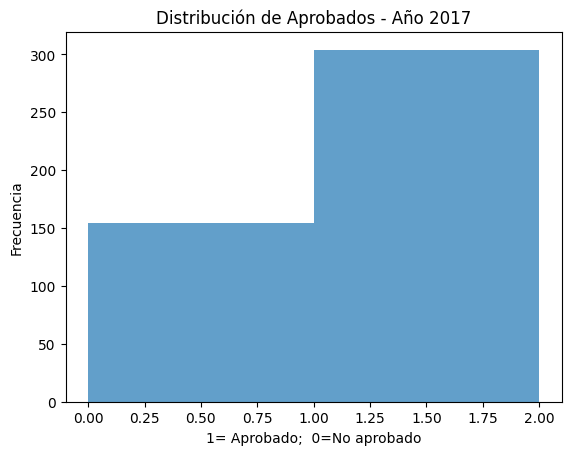

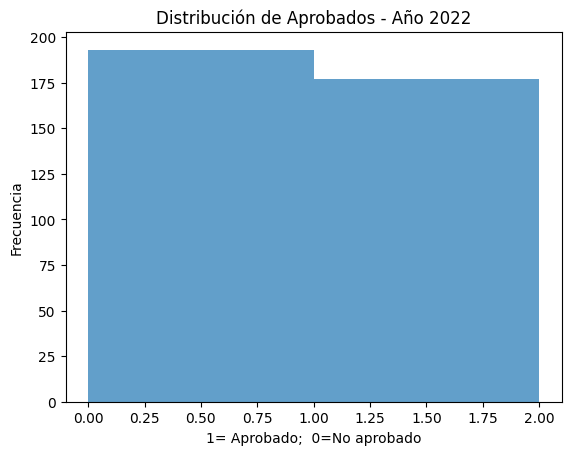

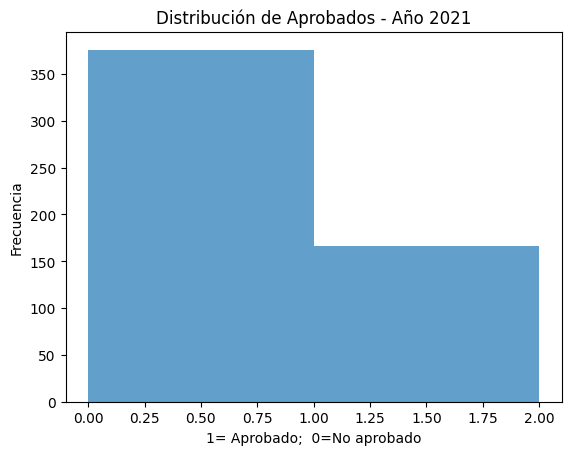

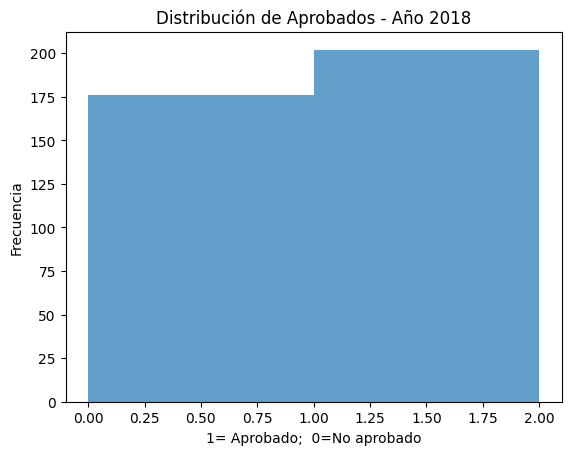

In [10]:
años = c2['Anho'].unique()
for i in años:
  datos_año = c2[c2['Anho']==i]['Aprobado']
  plt.figure()
  plt.hist(datos_año, bins=range(len(datos_año.unique()) + 1), alpha=0.7)
  plt.xlabel('1= Aprobado;  0=No aprobado')
  plt.ylabel('Frecuencia')
  plt.title(f'Distribución de Aprobados - Año {i}')
  plt.show()

In [11]:
df = c2.filter(items = ['Idalumno','Cod.Car.Sec','Anho','Ciclo','2P','Nota.Final','Asistencia'])
df['Cant.Materias'] = 0
df['Intentos'] = 0
df['Cant.c1'] = 0
df['Cant.est'] = 0
df['Cant.f1'] = 0
df['Nota.c1'] = 0
df['Nota.est'] = 0
df['Nota.f1'] = 0

In [ ]:
for i in df.index:
  for j in datos.loc[datos['Idalumno'] == df.loc[i,'Idalumno']].index:
    # Cantidad de materias que el alumno esta cursando en ese mismo semestre
    if df.loc[i,'Anho'] == datos.loc[j,'Anho'] and df.loc[i,'Ciclo'] == datos.loc[j,'Ciclo']:
      df.loc[i,'Cant.Materias'] += 1
    # Cantidad de intentos actuales y anteriores de cursar la materia
    if datos.loc[j,'Asignatura'] == 'CALCULO 2' and df.loc[i,'Anho'] <= datos.loc[j,'Anho'] and df.loc[i,'Ciclo'] != datos.loc[j,'Ciclo']:
      df.loc[i,'Intentos'] +=1
    # Cantidad de veces que se cursó calculo 1
    if datos.loc[j,'Asignatura'] == 'CALCULO 1':
      df.loc[i,'Cant.c1'] +=1


In [ ]:
df

,Idalumno,Cod.Car.Sec,Anho,Ciclo,2P,Nota.Final,Asistencia,Cant.Materias,Intentos,Cant.c1,Cant.est,Cant.f1,Nota.c1,Nota.est,Nota.f1
124,23,ELE-PLS13,2016,1,6,NaN,1,6,3,0,0,0,0,0,0
133,23,ELE-PLS13,2017,1,19,"1F-C-1,3F-C-1",1,7,3,0,0,0,0,0,0
150,23,ELE-PLS09,2018,1,0,3F-4,0,8,3,0,0,0,0,0,0
298,31,IND-PLS09,2016,1,0,NaN,0,1,1,0,2,0,0,0,0
300,32,CIV-PLS09,2016,1,0,NaN,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174987,4460,MCT-PLS13,2019,2,10,NaN,1,5,3,0,4,0,0,0,0
174995,4460,MCT-PLS13,2021,1,17,"1F-1,2F-2",1,8,3,0,4,0,0,0,0
175047,4461,CIV-PLS13,2018,1,14,NaN,1,7,2,0,3,0,0,0,0
175054,4461,CIV-PLS13,2018,2,15,1F-2,1,4,2,0,3,0,0,0,0
